In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("homeprices.csv")

In [3]:
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [4]:
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [5]:
df.shape

(47, 2)

In [6]:
df.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


In [7]:
df.columns

Index(['year', 'per capita income (US$)'], dtype='object')

In [8]:
print(df.isnull().sum())


year                       0
per capita income (US$)    0
dtype: int64


In [9]:
df = df.rename(columns={'per capita income (US$)': 'price'})

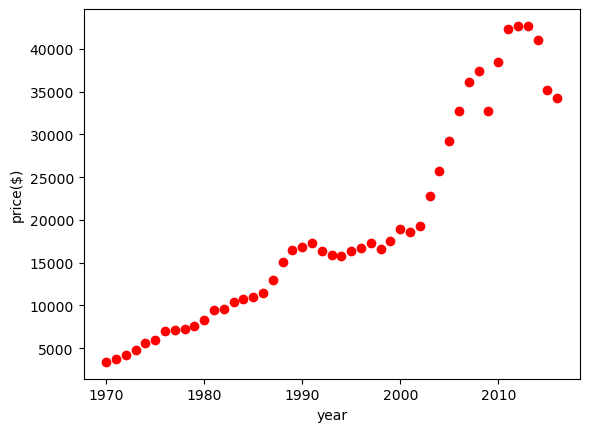

In [10]:

%matplotlib inline
plt.xlabel('year')
plt.ylabel('price($)')
plt.scatter(df.year,df.price,color="red")

In [11]:
reg = linear_model.LinearRegression()
reg.fit(df[['year']],df.price)

LinearRegression()

In [12]:
predictions = reg.predict(df[['year']])
print(predictions)

[ -134.55966672   693.9054085   1522.37048373  2350.83555895
  3179.30063417  4007.7657094   4836.23078462  5664.69585984
  6493.16093506  7321.62601029  8150.09108551  8978.55616073
  9807.02123595 10635.48631118 11463.9513864  12292.41646162
 13120.88153685 13949.34661207 14777.81168729 15606.27676251
 16434.74183774 17263.20691296 18091.67198818 18920.1370634
 19748.60213863 20577.06721385 21405.53228907 22233.9973643
 23062.46243952 23890.92751474 24719.39258996 25547.85766519
 26376.32274041 27204.78781563 28033.25289085 28861.71796608
 29690.1830413  30518.64811652 31347.11319175 32175.57826697
 33004.04334219 33832.50841741 34660.97349264 35489.43856786
 36317.90364308 37146.3687183  37974.83379353]


In [13]:
reg.coef_ ##katsayı 

array([828.46507522])

In [14]:
reg.intercept_ ## eksi çıktı, bu demek oluyor ki bir evin fiyatı yıl gectikce azaliyor

-1632210.7578554575

In [15]:
from sklearn.metrics import r2_score


r_squared = r2_score(df.price, predictions)
print("R-kare değeri:", r_squared)

R-kare değeri: 0.890916917957032


In [16]:
import pickle

In [17]:
with open('model_pickle','wb') as f:
    pickle.dump(reg,f)